<a href="https://colab.research.google.com/github/DidiRamsaran/AI_ML_projects/blob/main/LinearRegression_Practicum_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRACTICUM 2
## Linear Regression algorithm implementation


Author: D. Ramsaran Chin

Course: Artificial Intelligence: Machine Learning

Instructor: Dr. Pedro García


## Instructions

1. Upload and graph the "Fish" data set.

2. Select the characteristics "Weight" and "Height", from the species "Bream".

3. Adjust the affine function to that data set using:
>1. A linear Regression scheme based on the Least Squares estimation method and,
>2. A linear Regression scheme based on the gradient descent algorithm.

>In both cases, carry along the task without using python functions for linear adjustment.

4. For the gradient descent algorithm, optimize the learning parameter ($\gamma$).

5. Evaluate the algorithm's performance (gradient descent). In order to do so, devide teh data set into a training set and a validation set, and measure the  cuadratic mean error of the predictions for the validation set.

6. Compare the results to those obtained using linear scikit-learn's model.LinearRegression() function and compare its quality with that obtained previously.


In [ ]:
# first we call the libraries of our interest

import numpy as np                                        #
import pandas as pd                                       #
import seaborn as sns                                     # Seaborn for data visualisation
import matplotlib.pyplot as plt                           #
from sklearn.model_selection import train_test_split      #
from sklearn.metrics.pairwise import euclidean_distances  #
from collections import Counter                           #
import math                                               #


pd.set_option('display.max_columns', None) # this sets no limit for the abount of columns visualized


## Fish dataset

###Caracteristics:

1. Species - species' name.
2. Weight - of fish in gramos.
3. Length1 - (vertical) in cm.
4. Lenght2 - (diagonal) in cm.
5. Lenght3 - (transversal) in cm.
6. Height - in cm.
7. Widht - in cm.

Provided in Dr. Garcia's practice dataset

##Step 1. Upload and graph the "Fish" data set.

In [ ]:
# I uploaded teh Fish.csv to github and uploaded it from there
url_fish = "https://raw.githubusercontent.com/DidiRamsaran/AI_ML_projects/main/Fish.csv"

data = pd.read_csv(url_fish)

# we now print the variables in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
# Now we tabulate the frequencies for each fish species
data['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

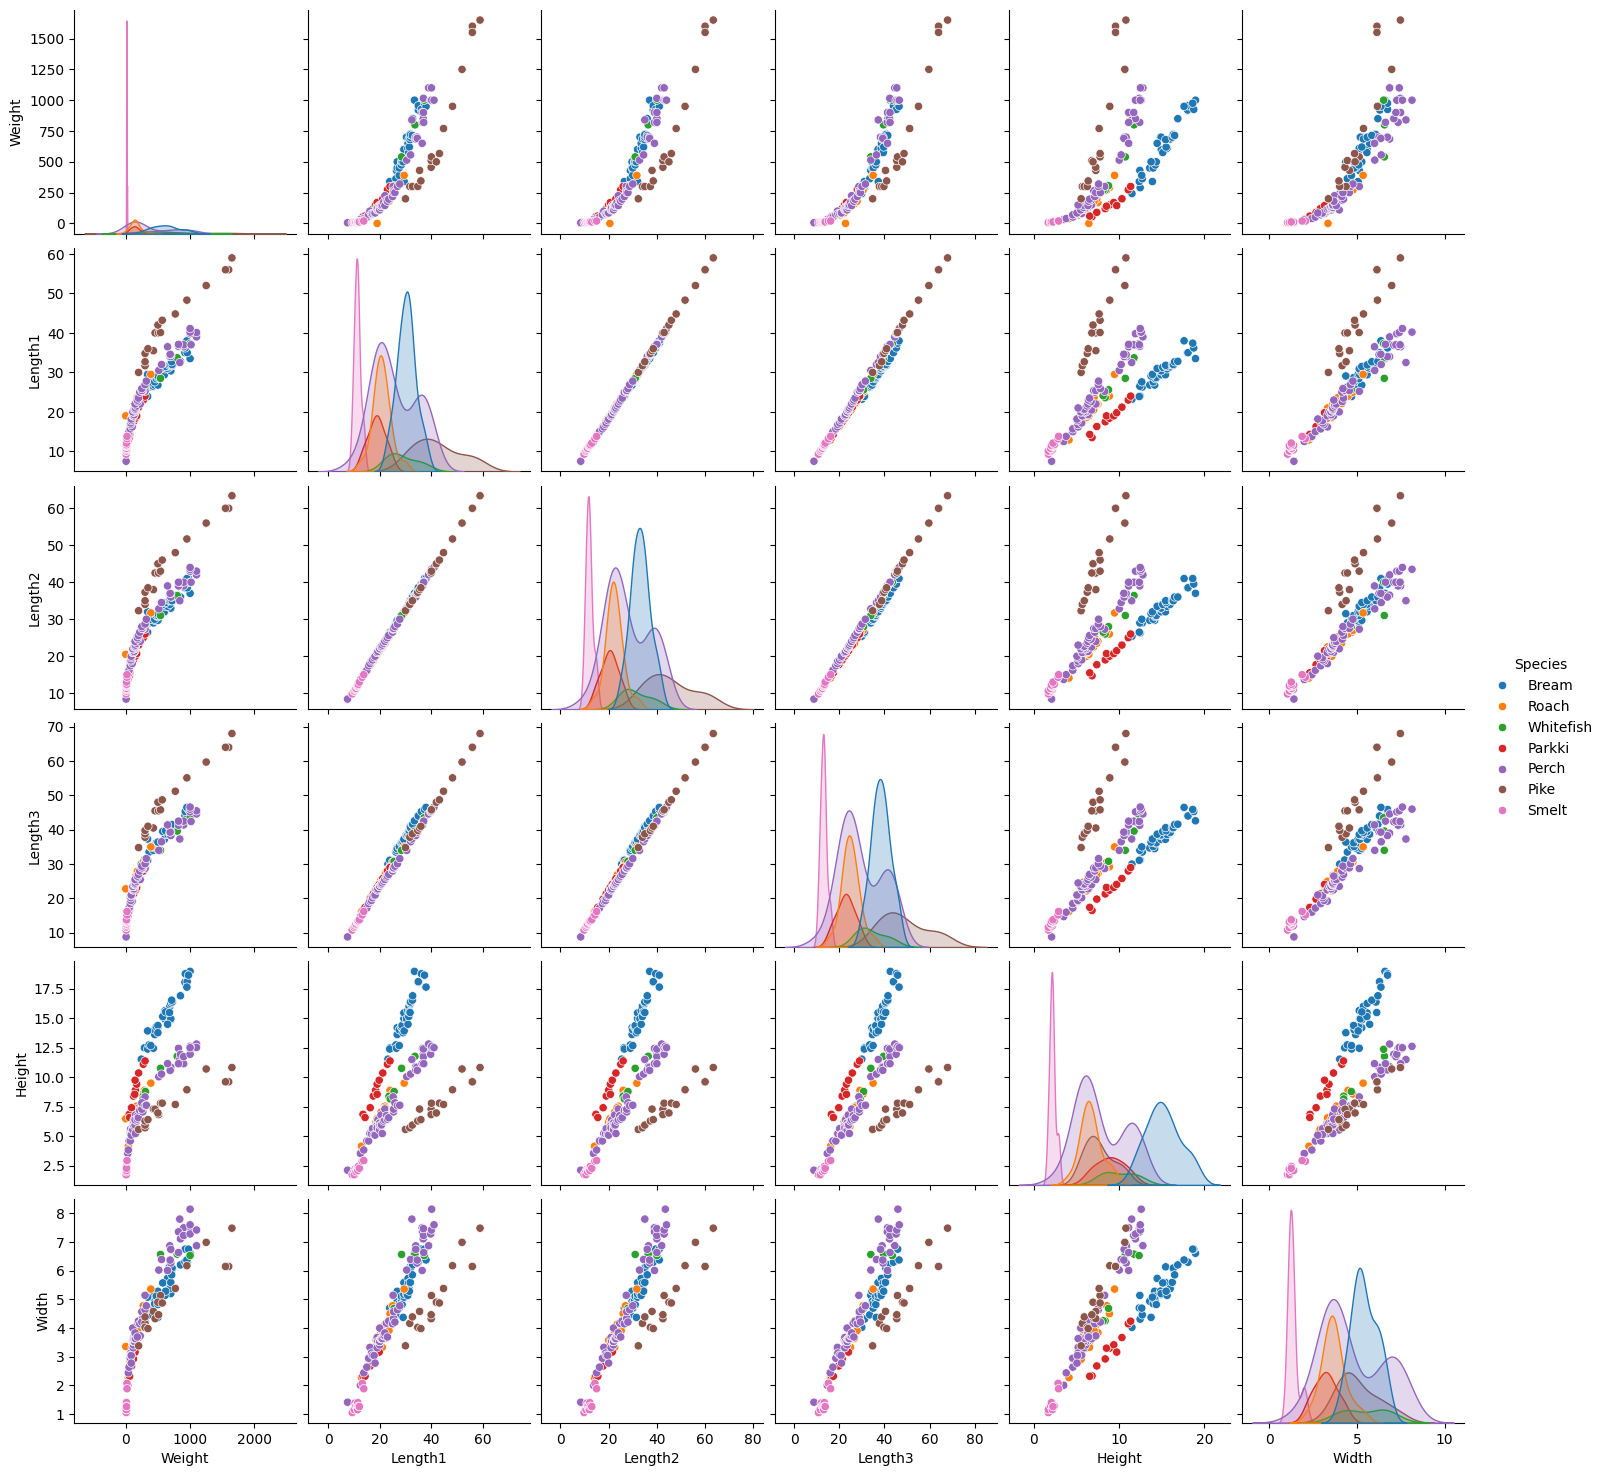

In [ ]:
# Now we proceed to plot the measurements

sns.pairplot(data,hue='Species') # we colour according to the species

# The following are pairwise dispersigrams, with diagonals presenting univariate distribution of each variable

##Paso 2. Extracción de las variables Weight y Height de la especie Bream.

data_filt: BBDD con solo la especie Bream

df_filt: df con columnas para Weight, Height y la especie (Bream)

df_cor: df con solo Weight y Height



In [ ]:
# se extrae la información de la especie deseada Bream
data_filt = data[data["Species"].isin(['Bream'])]

# teniendo la nueva data con las especies de interés, ahora se toman los vectores de interés Weight y Height
df_filt = pd.DataFrame(data_filt[["Weight", "Height", 'Species']])

In [ ]:
#se confirma el filtrado adecuado con la siguiente función
df_filt['Species'].value_counts()
#con lo cual se confirma la extracción exitosa de los datos de interés

Species
Bream    35
Name: count, dtype: int64

In [ ]:
#algunos estadísticos de interés
df_filt.describe()

,Weight,Height
count,35.000000,35.000000
mean,617.828571,15.183211
std,209.205709,1.964707
min,242.000000,11.520000
25%,462.500000,13.958900
50%,610.000000,14.954400
75%,717.000000,16.360900
max,1000.000000,18.957000


In [ ]:
# Tabla de correlación cruzada (de algunas caracteristicas)
df_cor = data_filt[['Weight','Height']]
df_cor.corr()

,Weight,Height
Weight,1.000000,0.964528
Height,0.964528,1.000000


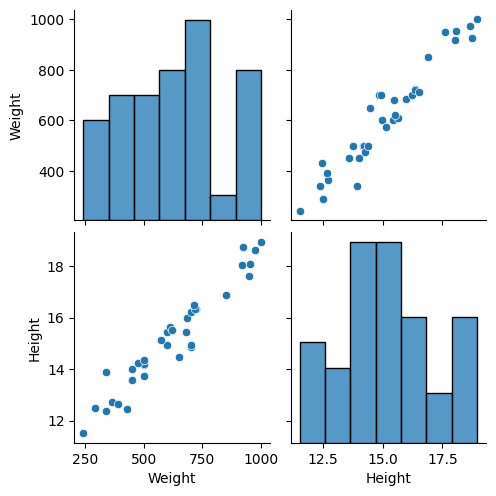

In [ ]:
#Gráficos de dispersión, con la priemra diagonal mostrando los histogramas respectivos a cada medida
sns.pairplot(df_cor)

Paso 3. Ajustar una función afín a ese conjunto de datos usando:
  31. Un esquema de regresión lineal basado en mínimos cuadrados y
  32. Un esquema de regresión lineal basado en el algoritmo de descenso de gradiente.

height: vector 1d con datos de Height

weight: vector 1d con datos de Weight




In [ ]:
#primero se hará la implementación del método basado en mínimos cuadrados

weight = np.array(df_filt['Weight'].tolist())
height = np.array(df_filt['Height'].tolist())

n = len(height)
k1 = (height*weight).sum()
k2 = (height**2).sum()
k3 = (height).sum()
k4 = (weight).sum()

m = -1*((k1*n - k3*k4) / ((k3)**2 - k2*n))
b = -1*((k2*k4 - k1*k3) / ((k3)**2 - k2*n))

print("n =", n)
print("k1 =", k1)
print("k2 =", k2)
print("k3 =", k3)
print("k4 =", k4)

print("m =", m)
print("b =", b)

n = 35
k1 = 341800.9855
k2 = 8199.789291
k3 = 531.4124
k4 = 21624.0
m = 102.70472641784289
b = -941.5590044871241


In [ ]:
#Si implementamos el método de estimación en forma matricial, se aprecia el siguiente código

M = np.array([[k2, k3], [k3, n]])

y = np.array([k1, k4])

M_i = np.linalg.inv(M)

p = M_i @ y

print(f"m = {p[0]}")
print(f"b = {p[1]}")

m = 102.70472641784302
b = -941.5590044871268


el EMC tiene un monto de 2962.8345115139


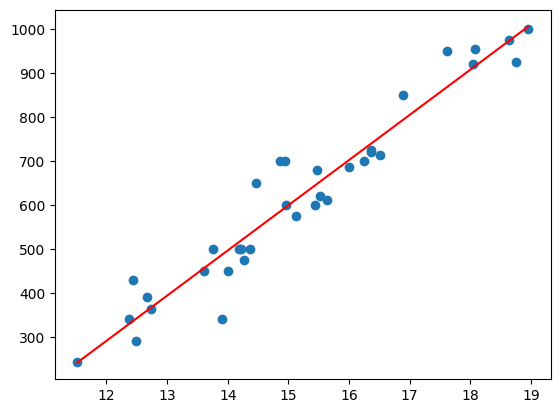

In [ ]:
#graficamos de seguido

# Making predictions
Y_pred1 = m*height + b

dif = ((weight - Y_pred1)**2)
#print(emc)
ecm = dif/(len(weight))
ECM = sum(ecm)
print(f"el EMC tiene un monto de {ECM}")

plt.scatter(height, weight)
plt.plot([min(height), max(height)], [min(Y_pred1), max(Y_pred1)], color='red')  # regression line
plt.show()

In [ ]:
#ahora procedemos con la implementación del esquema descenso de gradiente

#_d indica las variables propias del algoritmo de descenso de gradiente, las cuales fijamos a 0 como valor inicial
m_d = 0
b_d = 0


g = 0.01  # gamma, el hiperparámetro de aprendizaje
descensos = 90000  # número de veces que se arealiza la actualización de cada parámetro
n = 1


for i in range(descensos):
    Y_pred = m_d*height + b_d  # The current predicted value of Y
    D_m = (-1/(2*len(weight))) * sum(height * (weight - Y_pred))  # Derivada con respecto a m
    D_b = (-1/(2*len(weight))) * sum(weight - Y_pred)  # Derivada con respecto a b
    m_d = m_d - g * D_m  # actualización de m
    b_d = b_d - g * D_b  # actualización de b
    #n += 1 # aumento gradual del factor de normalización
    #print(f"con {i} input, Dm = {D_m}")
    #print(f"con {i} input, Db = {D_b}")
    #print(f"con {i} input, m = {m_d}")
    #print(f"con {i} input, b = {b_d}")
    #print(n)


print ("m =", m_d)
print("b =", b_d)

m = 102.65777031032515
b = -940.8345125614726


el EMC tiene un monto de 2962.8429126672613


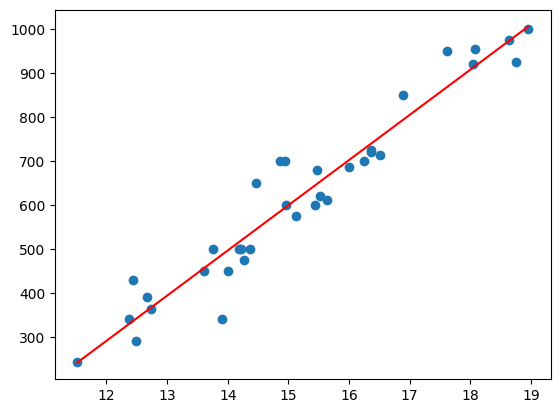

In [ ]:
#graficamos de seguido

# Making predictions
Y_pred2 = m_d*height + b_d

dif = ((weight - Y_pred2)**2)
#print(emc)
ecm = dif/(len(weight))
EMC = sum(ecm)
print(f"el EMC tiene un monto de {EMC}")

plt.scatter(height, weight)
plt.plot([min(height), max(height)], [min(Y_pred2), max(Y_pred2)], color='red')  # linea de regresión
plt.show()


##Paso 4. Optimizar, en el caso de descenso de gradiente, el parámetro de aprendizaje.

In [ ]:
#se optimmiza el gradiente utilizando la siguiente fórmula

#utilizando el código anterior
m_do = 0
b_do = 0


g_0 = 0.1  # gamma, el hiperparámetro de aprendizaje
descensos = 90000  # número de veces que se arealiza la actualización de cada parámetro
n = 1

for i in range(descensos):
    Y_predo = m_do*height + b_do  # The current predicted value of Y
    D_m = (-1/(2*len(weight))) * sum(height * (weight - Y_predo))  # Derivada con respecto a m
    D_b = (-1/(2*len(weight))) * sum(weight - Y_predo)  # Derivada con respecto a b
    m_do = m_d - g * D_m  # actualización de m
    b_do = b_d - g * D_b  # actualización de b
    g = g/2 #el parámetro de aprendizaje se configura con un decresimiento exponencial para hacer más pequeño su valor en función a la iteración

    #print(f"con {i} input, Dm = {D_m}")
    #print(f"con {i} input, Db = {D_b}")
    #print(f"con {i} input, m = {m_d}")
    #print(f"con {i} input, b = {b_d}")
    #print(n)


print ("m =", m_d)
print("b =", b_d)


m = 102.65777031032515
b = -940.8345125614726


el EMC tiene un monto de 2962.8429126672613


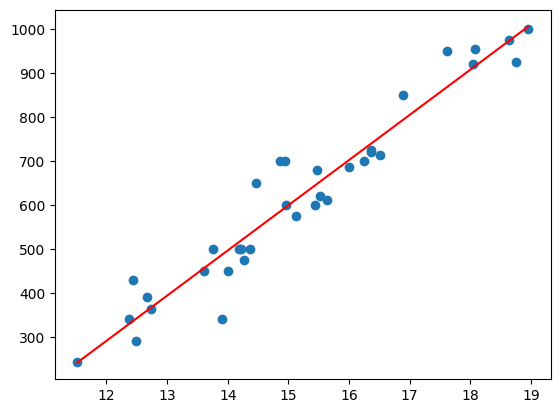

In [ ]:
#graficamos de seguido

# Making predictions
Y_pred2o = m_do*height + b_do

dif = ((weight - Y_pred2o)**2)
ecm = dif/(len(weight))
#print(emc)
EMC = sum(ecm)
print(f"el EMC tiene un monto de {EMC}")
#print(Y_pred2o)

plt.scatter(height, weight)
plt.plot([min(height), max(height)], [min(Y_pred2o), max(Y_pred2o)], color='red')  # linea de regresión
plt.show()

##Paso 5. Evaluar el desempeño del algoritmo. Para ello divida la data en un conjunto de entrenamiento y uno de validación y mida el error cuadrático medio de las prediccdiones sobre el conjunto de validación.

In [ ]:
# se divide la en sets de entrenamiento y de prueba
height_train, height_test, weight_train, weight_test = train_test_split(height, weight, test_size=0.33, random_state=42)


# empleando el algoritmo de descenso de gradiente optimizado
m_d_tr = 0
b_d_tr = 0


g_0 = 0.01  # gamma, el hiperparámetro de aprendizaje
descensos = 90000  # número de veces que se arealiza la actualización de cada parámetro
n = 1

#se genera el modelo con los datos de entrenamiento
for i in range(descensos):
    Y_pred_tr = m_d_tr*height_train + b_d_tr  # The current predicted value of Y
    D_m = (-1/(2*len(weight_train))) * sum(height_train * (weight_train - Y_pred_tr))  # Derivada con respecto a m
    D_b = (-1/(2*len(weight_train))) * sum(weight_train - Y_pred_tr)  # Derivada con respecto a b
    m_d_tr = m_d - g * D_m  # actualización de m
    b_d_tr = b_d - g * D_b  # actualización de b
    g = g_0/2 #el parámetro de aprendizaje se configura con un decresimiento exponencial para hacer más pequeño su valor en función a la iteración

# se imprimen los parámetros estimados del modelo de entrenamiento
print("m =", m_d)
print("b =", b_d)
print("n =", len(height_train))

# estimador del error
dif = ((weight_train - Y_pred_tr)**2) # diferencia cuadrada
ecm_tr = dif/(len(weight_train)) # normalización
ECM_tr = sum(ecm_tr) # indicador puntual de la función de costo mínimos cuadrados
print(f"el ECM es {ECM_tr}")


m = 102.65777031032515
b = -940.8345125614726
n = 23
el ECM es 2210.8142806563505


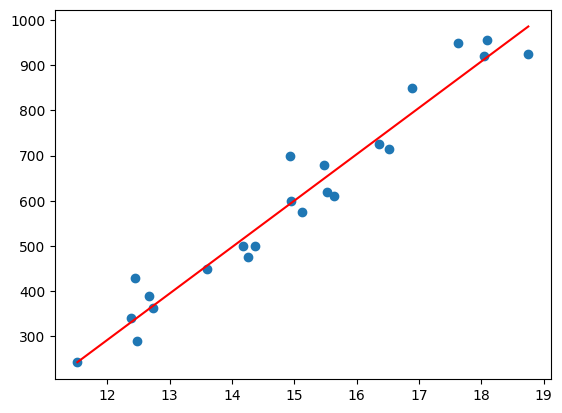

In [ ]:
# graficación
Y_pred_tr = m_d_tr*height_train + b_d_tr

plt.scatter(height_train, weight_train)
plt.plot([min(height_train), max(height_train)], [min(Y_pred_tr), max(Y_pred_tr)], color='red')  # linea de regresión

plt.show()


In [ ]:
# ahora se predicen los valores de weight_test con base en height_test, a través del modelo de entrenamiento
predicted_weight = m_d_tr*height_test + b_d_tr

# se genera un df con los valores de prueba originales y los predichos en función al modelo de entrenamiento
og_pred = pd.DataFrame({'actual weight':weight_test, 'predicted weight':predicted_weight})

pd.set_option('display.max_rows', None) # se configura la función para mostrar todas las filas

print(og_pred)



dif = ((weight_test - predicted_weight)**2) # diferencia cuadrada
ecm_te = dif/(len(weight_test)) # normalización
ECM_te = sum(ecm_te) # indicador puntual de la función de costo mínimos cuadrados

print(f"el ECM es {ECM_te}")

    actual weight  predicted weight
0           720.0        740.061729
1           340.0        488.479729
2           700.0        727.600258
3           685.0        702.235565
4           600.0        645.157302
5          1000.0       1006.673517
6           650.0        546.102475
7           500.0        472.689720
8           450.0        497.931133
9           700.0        585.818920
10          500.0        520.706963
11          975.0        973.634695
el ECM es 4408.096791928686


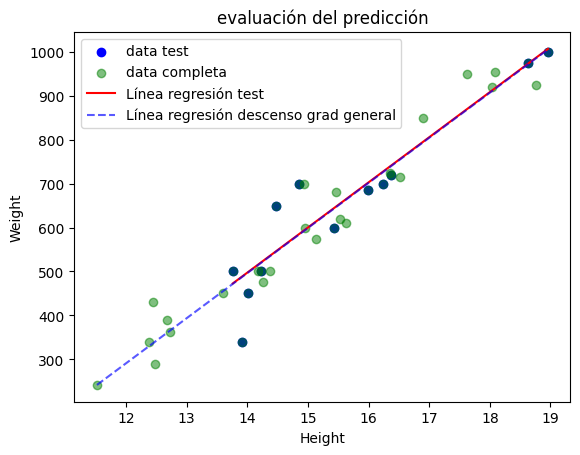

In [ ]:


plt.scatter(height_test, weight_test, color='blue', label='data test')
plt.scatter(height, weight, color='green', label='data completa', alpha=0.5)

# Plot regression line (optional)
plt.plot([min(height_test), max(height_test)], [min(predicted_weight), max(predicted_weight)], color='red', label='Línea regresión test')
plt.plot([min(height), max(height)], [min(Y_pred2o), max(Y_pred2o)], color='#0000FF', label='Línea regresión descenso grad general', linestyle="--", alpha=0.65)  # linea de regresión


# Add labels and title
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('evaluación del predicción')

# Add legend
plt.legend()

plt.show()


##Paso 6. Compare sus resultados con los obtenidos usando linear model.LinearRegression() de scikit-learn y compare su calidad, con la obtenida anteriormente.

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

height_r = height.reshape(-1, 1)  #
reg.fit(height_r, weight) #se general el modelo general entre la altura (vi) y el peso (vd)


dif = ((weight - reg.predict(height_r))**2) # diferencia cuadrada

ecm_skl = dif/(2*len(weight)) # normalización
ECM_skl = sum(ecm_skl) # indicador puntual de la función de costo mínimos cuadrados
print(f"el ECM es {ECM_skl}")

# los mejores valores para m y b según el algoritmo
print(f"pendiente (m): {reg.coef_[0]:.4f}")
print(f"Intercepto (b): {reg.intercept_:.2f}")

el ECM es 1481.4172557569523
pendiente (m): 102.7047
Intercepto (b): -941.56


In [ ]:
# se divide la en sets de entrenamiento y de prueba
height_train1, height_test1, weight_train1, weight_test1 = train_test_split(height_r, weight, test_size=0.33, random_state=42)

# se procede a  implementar el algoritmo de sk learn para entrenar
reg.fit(height_train1, weight_train1)

# se predicen los valores de weight de prueba a partir del modelo generado en el entrenamiento
predicted_weight1 = reg.predict(height_test1)

# se crea un dt con el weight real y el predicho por el modelo
og_pred1 = pd.DataFrame({'actual weight':weight_test1, 'predicted weight':predicted_weight1})

print(og_pred1)


dif = ((weight_test1 - reg.predict(height_test1))**2) # diferencia cuadrada

ecm_skl1 = dif/(len(weight_test1)) # normalización
ECM_skl1 = sum(ecm_skl1) # indicador puntual de la función de costo mínimos cuadrados

print(f"el ECM es {ECM_skl1}")
#print(ecm_skl)


    actual weight  predicted weight
0           720.0        741.933741
1           340.0        490.633749
2           700.0        729.486239
3           685.0        704.149978
4           600.0        647.135696
5          1000.0       1008.246674
6           650.0        548.191904
7           500.0        474.861439
8           450.0        500.074558
9           700.0        587.863829
10          500.0        522.824858
11          975.0        975.244886
el ECM es 4441.4507329708385


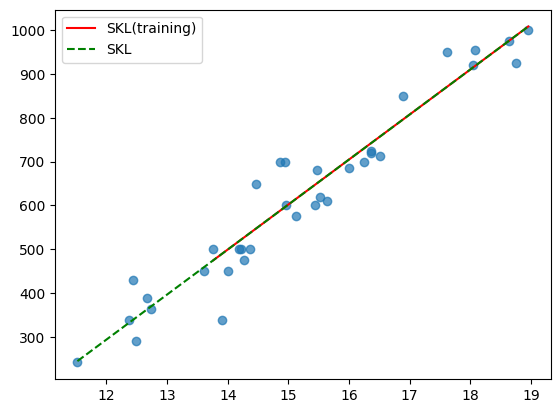

In [ ]:
# se grafican los modelos trabajados hasta ahora

plt.scatter(height, weight, alpha = 0.7)
plt.plot([min(height_test1), max(height_test1)], [min(reg.predict(height_test1)), max(reg.predict(height_test1))], color='red', label='SKL(training)')  # linea de regresión con skl
plt.plot([min(height_r), max(height_r)], [min(reg.predict(height_r)), max(reg.predict(height_r))], color='green', label='SKL', linestyle='--')  # linea de regresión con skl

plt.legend()

plt.show()
